<a href="https://colab.research.google.com/github/Clinda02/text_data_analysis/blob/main/NLP/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

* 데이터 출처 : https://github.com/e9t/nsmc/

  * ratings.txt.txt
  *  ratings_test.txt
  * ratings_train.txt

In [5]:
import pandas as pd

# raw > 링크 주소 복사
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt',sep = '\t')
# csv 파일 구분자 : ,(콤마)
# txt 파일 구분자 : \t(탭)

df.head()

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

# EDA

In [6]:
# shape
df.shape

(150000, 3)

shape을 확인한 결과, train 데이터는 150,000개의 인스턴스와 3개의 컬럼으로 구성된 것을 알 수 있음.

In [7]:
# null 데이터
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


id          0
document    5
label       0
dtype: int64

In [8]:
# document 칼럼에 null이 포함되어 있는 경우만 추출
df[df['document'].isnull()]

id document  label
25857   2172111      NaN      1
55737   6369843      NaN      1
110014  1034280      NaN      0
126782  5942978      NaN      0
140721  1034283      NaN      0

불러온 데이터에 결측치가 포함되어 있는지 여부를 확인한 결과, `document` 칼럼에 5개의 결측치가 포함되어 있음을 확인함.


결측치가 포함된 칼럼의 `label`은 1(positive)가 2개 0(negative)가 3개로 각 카테고리에 거의 비슷한 분포로 결측치가 포함되어 있음.





In [9]:
#결측치 제거
df.dropna(inplace = True)

전체 데이터 양에 비해 결측치가 차지하는 비중이 낮으므로, 결측치를 삭제하고, 데이터 분석을 진행하고자 함.

In [10]:
df.shape

(149995, 3)

결측치 처리 결과, 149,995개의 인스턴스가 최종적으로 남아있음을 확인할 수 있음.

In [11]:
#label 분포
df['label'].value_counts()

label
0    75170
1    74825
Name: count, dtype: int64

train 데이터 셋에 대해서 label의 분포를 확인한 결과, 0(negative)는 75,170개, 1(positive)는 74,825개로 거의 비슷한 비율로 분포되어 있음.

In [12]:
#텍스트 길이
df['len'] = df['document'].str.len()

print(df['len'].mean())
df.head()

35.204526817560584


id                                           document  label  len
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   19
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1   33
2  10265843                                  너무재밓었다그래서보는것을추천한다      0   17
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0   29
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1   61

<Axes: xlabel='len', ylabel='Count'>

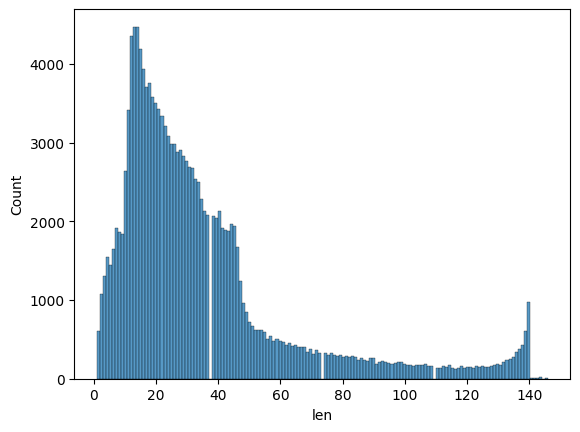

In [13]:
# 텍스트 길이 시각화
import seaborn as sns

sns.histplot(df['len'])

일반적으로 사용자는 **20 ~ 30자** 글자 사이의 댓글을 가장 많이 다는 것을 알 수 있었다. 추후 신경망을 사용하여 학습하기 위해, 글자수를 특정값 기준으로 잘라줘야 할 경우, **`60 글자`** 정도 수준에서 분할하여 처리할 예정이다.

# 워드 클라우드
- 긍정/부정 후기에 따른 빈도수 top 50 명사의 워드클라우드 시각화

In [14]:
# 워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm

# 나눔 고딕 폰트를 사용하도록 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,944 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


워드클라우드를 생성하기 위해 `document` 컬럼에 담긴 데이터를 긍정과 부정으로 나누어서 별도의 변수(`positive_text`, `negative_test`)에 담아두기 위한 과정

### 단계 1:
*
*

In [ ]:
# label을 통해 긍정/부정 코멘트 분리
# positive
positive_text = df_len[df_len['label']== 1]['document']
positive_text.head()

# negative
negative_text = df_len[df_len['label']==0]['document']
negative_text.head()

0                              아 더빙.. 진짜 짜증나네요 목소리
2                                너무재밓었다그래서보는것을추천한다
3                    교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
5    막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                            원작의 긴장감을 제대로 살려내지못했다.
Name: document, dtype: object

In [ ]:
positive_text.head()

1                     흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
4     사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
8                                액션이 없는데도 재미 있는 몇안되는 영화
9         왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
10                                     걍인피니트가짱이다.진짜짱이다♥
Name: document, dtype: object

In [ ]:
# DataFrame 구조의 문자를 문자열 형태로 변환
negative_text = ' '.join(negative_text.astype(str))
positive_text = ' '.join(positive_text.astype(str))

negative_text

'아 더빙.. 진짜 짜증나네요 목소리 너무재밓었다그래서보는것을추천한다 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. 원작의 긴장감을 제대로 살려내지못했다. 별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해 취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지 굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐 재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있고 음식 보는재미도 있는데 ; 이건 볼게없다 음식도 별로 안나오고, 핀란드 풍경이라도 구경할랫는데 그것도 별로 안나옴 ㅡㅡ 주제는 좋은데 중반부터 지루하다 다 짤랐을꺼야. 그래서 납득할 수 없었던거야.. 그럴꺼야.. 꼭 그랬던걸꺼야.. 카밀라벨 발연기 졸쓰레기 진부하고말도안됌ㅋㅋ 아..시간아까워 1%라도 기대했던 내가 죄인입니다 죄인입니다.... 키이라 나이틀리가 연기하고자 했던건 대체 정신장애일까 틱장애일까 포스터는 있어보이는데 관객은 114명이네 \'다 알바생인가 내용도 없고 무서운거도 없고 웃긴거도 하나도 없음 완전 별싱거운 영화.ㅇ.ㅇ내ㅇ시간 넘 아까움 .. . 완전 낚임 평점에속지마시길시간낭비 돈낭비임 리얼리티가 뛰어나긴 한데 큰 공감은 안간다. 이민기캐릭터는 정신의학상 분노조절장애 초기 증상일거다. 툭하면 사람패고 욕하고 물건 파손하고.. 조금 오바였음. 극 초반엔 신선했는데 가면 갈수록 이민기 정신상태 공감불가. 마이너스는 왜없냐 ㅋ 뮤비 보고 영화수준 딱 알만하더군 ㅉㅉ 북한에서 이런거 만들라고 돈 대주던? 난 우리영화를 사랑합니다....^^; 야 세르게이! 작은고추의 매운맛을 보여주마! 포퐁저그 콩진호가 간다 난또 저 꼬마애

**`.astype(str)`**의 역할
- positive_text = ' '.join(positive_text)             
   : document 연결 시 공백 분리 X,  숫자, NaN값 혹은 다른 타입의 값이 포함된 경우, **TypeError** 발생 가능.
- positive_text = ' '.join(positive_text.astype(str))
  
  : document 연결 시 공백 분리 , 숫자 및 NaN 모두 문자열로 인식.

In [ ]:
positive_text

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 액션이 없는데도 재미 있는 몇안되는 영화 왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? 걍인피니트가짱이다.진짜짱이다♥ 볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~ 담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을. ㄱ냥 매번 긴장되고 재밋음ㅠㅠ 참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다 이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥ 약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요. 나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님 보면서 웃지 않는 건 불가능하다 절대 평범한 영화가 아닌 수작이라는걸 말씀드립니다. kl2g 고추를 털어버려야 할텐데 재밋는뎅 센스있는 연출력..탁월한 캐스팅..90년대의 향수.. 그래서 9점.. 엄포스의 위력을 다시 한번 깨닫게 해준 적.남 꽃검사님도 연기 정말 좋았어요! 완전 명품드라마! 재밌는데 별점이 왜이리 낮은고 아직도 이 드라마는 내인생의 최고! 패션에 대한 열정! 안나 윈투어! 허허...원작가 정신나간 유령이라... 재미있겠네요! 이 영화가 왜 이렇게 저평가 받는지 모르겠다 단순하면서 은은한 매력의 영화 오게두어라! 서리한이 굶주렸다! 정말 맘에 들어요. 그래서 또 보고싶은데 또 보는 방법이 없네? >.. ㅜㅡ 윤제문이라는 멋진 배우를 발견하게 됐어요. 소소한 일탈이 잔잔한 미소를 머금게 합니다. 음악은 조금 아쉽네요ㅠㅠ 8점 주고 싶은데 평점 올리고 싶어 10점 줄게요^^ 데너리스 타르 가르엔...나도 용의주인이 되고 싶다...누이랑,근친상간이나 하고 다닐지라도,소설 속에선 제일 멋진 놈이 자이메

### 단계 2 : 명사 추출(토큰화)

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 26.8 MB/s eta 0:00:00


주어진 문장에서 명사만 추출하여 토큰화하고, 명사의 빈도수에 기초하여 워드클라우드를 생성하고자 함.


In [ ]:
from konlpy.tag import Okt
okt = Okt()

# 각 문자열에서 명사만 추출
negative_nouns = okt.nouns(negative_text)
positive_nouns = okt.nouns(positive_text)

### 단계 3 : 각 명사별 빈도수 확인
-  Counter 사용
  - 특정 단어가 몇 번 등장했는지 딕셔너리 타입으로 반환 (예: {"영화", 50})

In [ ]:
# 추출한 명사에서 각 명사가 몇 번 등장했는지 확인
from collections import Counter # 특정 단어가 몇 번 등장했는지 딕셔너리 타입으로 반환 (예: {"key", 50})
negative_counts = Counter(negative_nouns)
positive_counts = Counter(positive_nouns)

### 단계 4 : Top 50 단어 추출

In [15]:
# 자주 등장한(예: 50번 이상 등장한) 단어에 대해서만 워드 클라우드 생성
top_50_negative = negative_counts.most_common(50) # 특정 빈도수 이상 나타난 단어들을 반환
top_50_positive = positive_counts.most_common(50)

top_50_negative

NameError: name 'negative_counts' is not defined

### 단계 5 : 워드 클라우드 생성
(참고)
top 50 단어에 대해서 워드클라우드를 생성하였지만, 불용어처리(예, 자주 등장하는 단어중 긍정/부정 의미가 없는 '영화', '정말', '진짜' 등)하고, 단어수를 늘려서 워드클라우드를 생성한다면, 긍정/부정

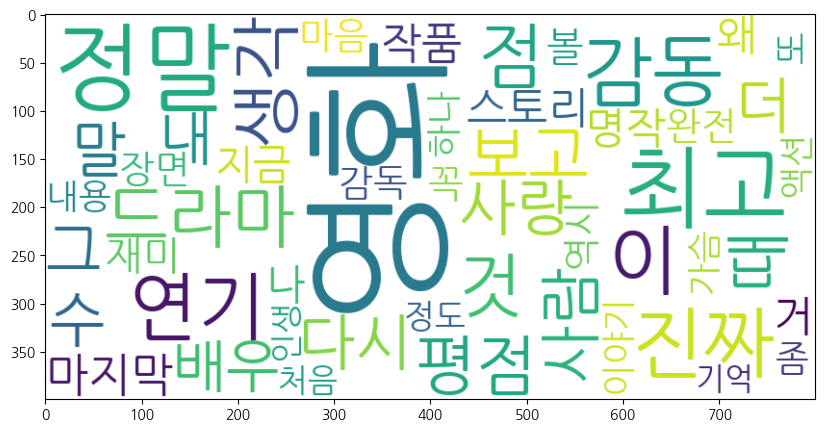

In [ ]:
#워드클라우드_긍정
wordcloud = WordCloud(font_path=font_path,
                      width = 800, height= 400,
                      background_color = 'white').generate_from_frequencies(dict(top_50_positive))

#결과 시각화
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

(참고)
top 50 단어에 대해서 워드클라우드를 생성하였지만, 불용어처리(예, 자주 등장하는 단어중 긍정/부정 의미가 없는 '영화', '정말', '진짜' 등)하고, 단어수를 늘려서 워드클라우드를 생성한다면, 긍정/부정

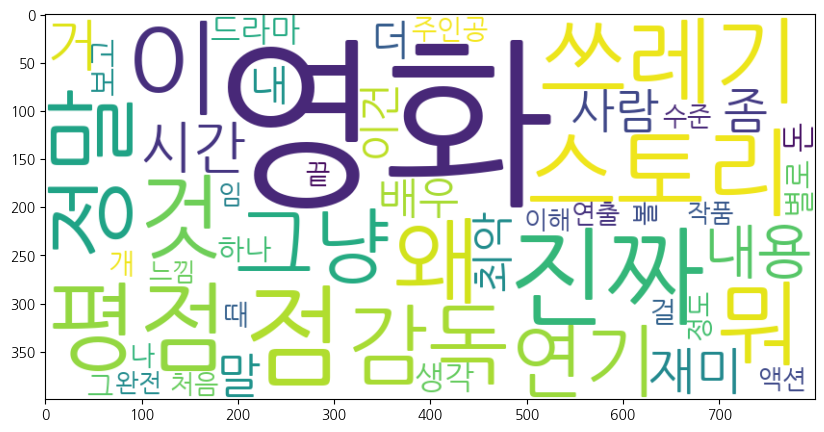

In [ ]:
#워드클라우드_부정
wordcloud = WordCloud(font_path=font_path,
                      width = 800, height= 400,
                      background_color = 'white').generate_from_frequencies(dict(top_50_negative))

#결과 시각화
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
dir(WordCloud)
# generate_from_frequencies 사용 시 빈도수에 따른 단어 크기가 설정됨.

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'fit_words',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'process_text',
 'recolor',
 'to_array',
 'to_file',
 'to_image',
 'to_svg']

# 데이터 전처리
- 텍스트 데이터를 신경망에 입력하기 위한 전처리

# 학습 모델 생성
- LSTM 신경망을 사용하여 긍부정(이진분류)를 판단할 수 있는 분류기 생성

# 평가
- 정확도(acccuracy) 기반 평가